In [46]:
import pandas as pd
import numpy as np
from collections import Counter

import statsmodels
import scipy as sc
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("botswana.tsv", sep = "\t", header = 0)

In [48]:
data

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4357,2,28,7,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4358,4,24,5,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0


In [49]:
Counter(data["religion"])

Counter({'catholic': 447, 'protestant': 993, 'spirit': 1841, 'other': 1080})

In [50]:
data.dropna()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0
5,1,30,5,spirit,5.0,1.0,0.0,1,24.0,7.0,1,1.0,0.0,0.0,0.0
6,3,42,4,other,3.0,1.0,0.0,1,15.0,11.0,1,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,9,49,0,protestant,5.0,0.0,0.0,1,15.0,0.0,0,0.0,1.0,0.0,0.0
4354,3,31,2,protestant,4.0,1.0,1.0,1,18.0,0.0,0,0.0,1.0,0.0,0.0
4355,4,27,6,protestant,4.0,1.0,1.0,1,17.0,7.0,0,0.0,0.0,0.0,0.0
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0


In [51]:
data["nevermarr"] = 1 * data["agefm"].isnull()

In [52]:
data.drop(columns="evermarr", inplace = True)

In [53]:
data["agefm"] = data["agefm"].fillna(0)

In [54]:
data["heduc"].count()

1956

In [55]:
nes = data["heduc"].values 
nes[data["nevermarr"] == 1] = -1*data[data["nevermarr"] == 1]["heduc"].isnull()
data["heduc"] = nes

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
ceb          4361 non-null int64
age          4361 non-null int64
educ         4361 non-null int64
religion     4361 non-null object
idlnchld     4241 non-null float64
knowmeth     4354 non-null float64
usemeth      4290 non-null float64
agefm        4361 non-null float64
heduc        4238 non-null float64
urban        4361 non-null int64
electric     4358 non-null float64
radio        4359 non-null float64
tv           4359 non-null float64
bicycle      4358 non-null float64
nevermarr    4361 non-null int64
dtypes: float64(9), int64(5), object(1)
memory usage: 511.2+ KB


In [57]:
4361 - 4238

123

In [58]:
def fil_na(data, col, val, name):
    data[name] = 1*data[col].isnull()
    data[col] = data[col].fillna(val)
    return data

In [59]:
data = fil_na(data, "idlnchld", -1, "idlnchld_noans")
data = fil_na(data, "heduc", -2, "heduc_noans")
data = fil_na(data, "usemeth", -1, "usemeth_noans")

In [60]:
data

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0,0,0,0


In [79]:
data.dropna(inplace=True)

In [80]:
4348*18

78264

In [81]:
print(" + ".join(data.columns[1:]))

age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans


In [82]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric\
+ radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        03:08:26   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [83]:
statsmodels.stats.diagnostic.het_breuschpagan(fitted.resid, fitted.model.exog, )[1]

1.1452927633445016e-225

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        03:08:27   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

/Users/maxim/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


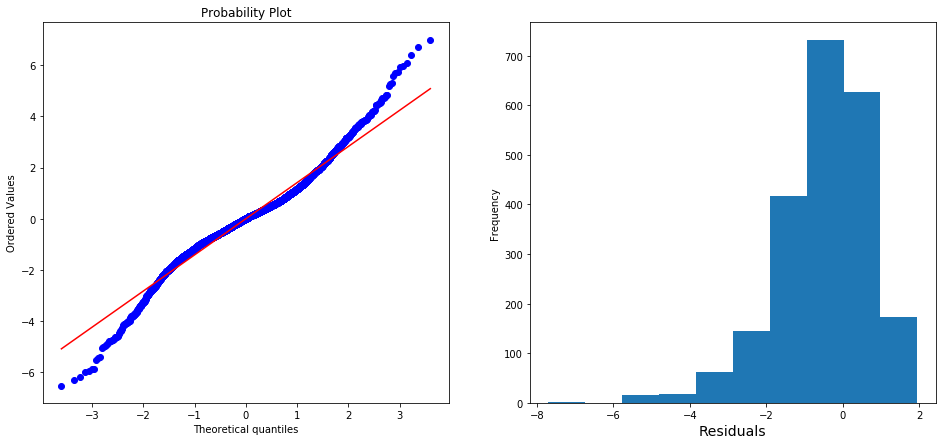

In [84]:
m2 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric\
+ radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data)
fitted = m2.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize = (16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

In [85]:
statsmodels.stats.diagnostic.het_breuschpagan(fitted.resid, fitted.model.exog, )[1]

1.1452927633445016e-225

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        03:08:27   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

/Users/maxim/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


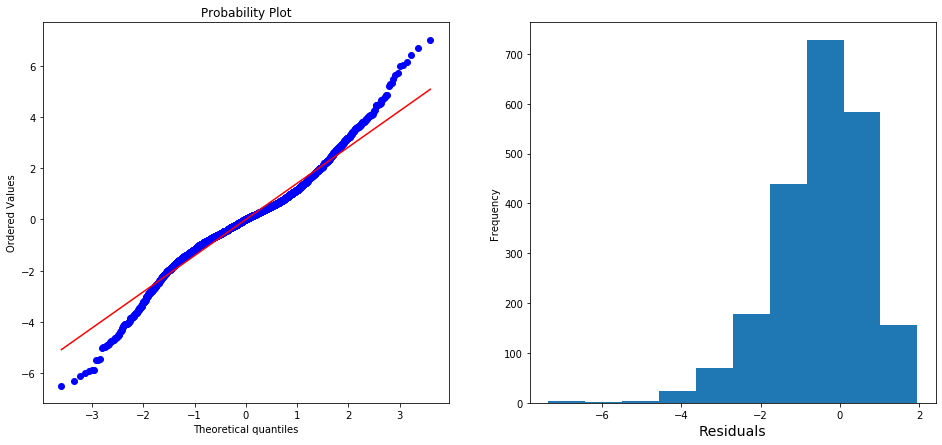

In [86]:
m3 = smf.ols('ceb ~ age + educ +  idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric\
+ bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data)
fitted = m3.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize = (16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

In [87]:
statsmodels.stats.diagnostic.het_breuschpagan(fitted.resid, fitted.model.exog, )[1]

1.1197458896536614e-228

In [93]:
m1.fit(cov_type='HC1').compare_f_test(m3.fit(cov_type='HC1'))

/Users/maxim/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)


(0.9192357784628133, 0.46723055472768693, 5.0)

<Figure size 576x504 with 0 Axes>

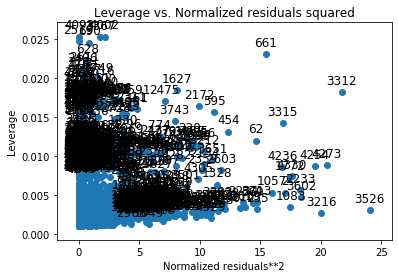

In [89]:
plt.figure(figsize = (8,7))
plot_leverage_resid2(fitted)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        03:08:31   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

/Users/maxim/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


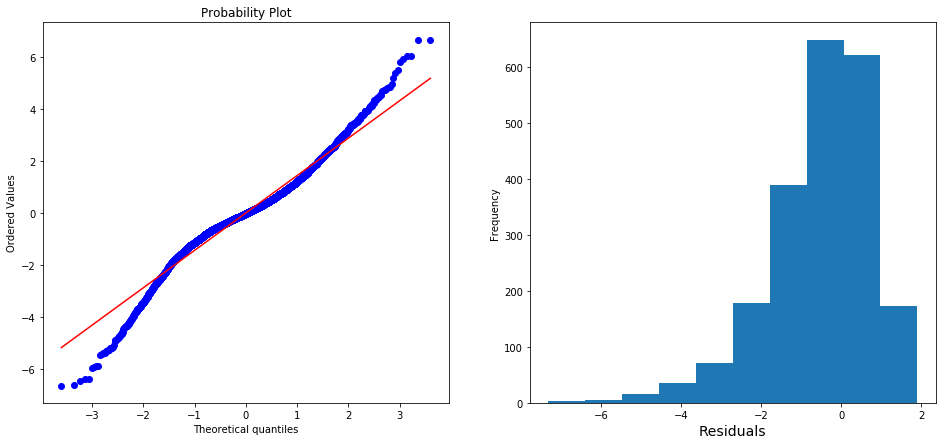

In [90]:
m4 = smf.ols('ceb ~ age + educ +  idlnchld + knowmeth  + agefm + heduc + urban + electric\
+ bicycle + nevermarr + idlnchld_noans + heduc_noans ', 
             data=data)
fitted = m4.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize = (16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

In [91]:
m1.fit().compare_f_test(m4.fit())

(27.194289901619587, 8.658707662549923e-37, 7.0)

In [92]:
-0.5267 +0.0705

-0.45619999999999994